In [14]:
from functools import partial
import itertools
import json
from pathlib import Path
import re
import sys
sys.path.append("../src")

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
from sklearn.manifold import TSNE
from tqdm import tqdm, tqdm_notebook

%matplotlib inline
sns.set(style="whitegrid", context="paper", font_scale=1, rc={"lines.linewidth": 2})
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
#set_matplotlib_formats('svg')

%load_ext autoreload
%autoreload 2
import util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Path to decoder results
decoder_path = Path("../models/decoders")
bert_encoding_path = Path("../models/bert")

In [3]:
# Path to BERT directory, containing model checkpoints
bert_path = Path("~/om2/others/bert").expanduser()
# Base model used as init checkpoint for finetuning
bert_base_model = "uncased_L-12_H-768_A-12"
# Fine-tuning tasks / models
bert_models = ["_", "SQuAD", "QQP", "MNLI", "SST", "LM", "LM_lmonly", "LM_scrambled", "LM_scrambled_para", "LM_contentonly", "LM_randommask", "LM_pos"]
other_models = ["glove"]
# Models which should appear in the final report figures
report_models = ["SQuAD", "QQP", "MNLI", "SST", "LM", "LM_scrambled", "LM_scrambled_para", "LM_pos", "glove"]
checkpoint_steps = list(range(5,255,5))
# Describes the particular fine-tuning regime used
finetune_desc = "finetune-250"
target_runs = [1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
RENDER_FINAL = True
figure_path = Path("../reports/figures")
figure_path.mkdir(exist_ok=True)

In [21]:
sentences = util.load_sentences("../data/sentences/stimuli_384sentences.txt")

---

In [5]:
to_render = [("LM_pos", 1), ("LM_scrambled_para", 1)]

In [9]:
render_model, render_run = to_render[0]
encoding = util.load_encodings([bert_encoding_path / ("encodings.%s.%s.%s-run%i-250.npy" % (finetune_desc, bert_base_model, render_model, render_run))])

In [10]:
encoding_t = TSNE().fit_transform(encoding)
f = plt.figure(figsize=(25, 25))
plt.scatter(encoding_t[:, 0], encoding_t[:, 1])

for i, sent in enumerate(sentences):
    x, y = encoding_t[i]
    plt.text(x, y, " ".join(sent.split(" ")[:3]))

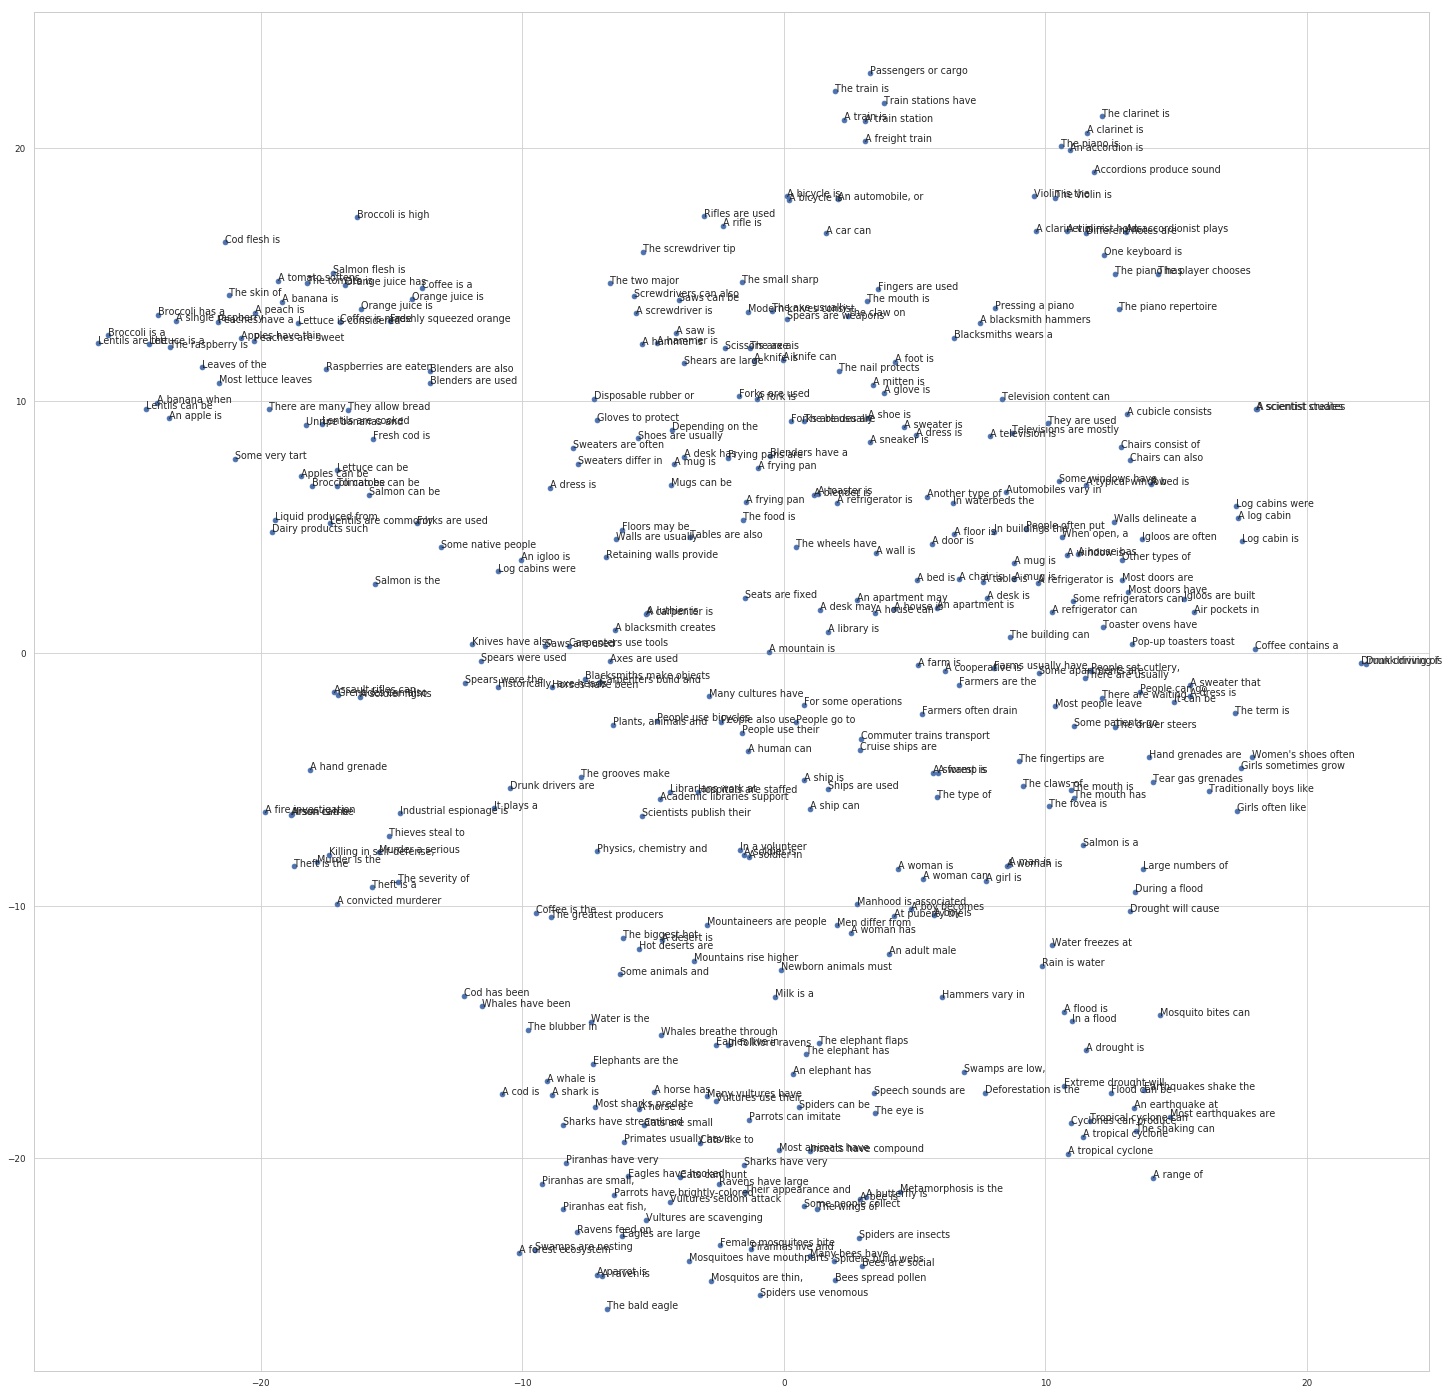